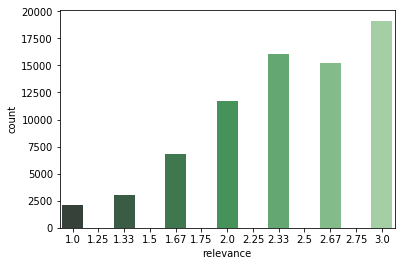

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.tokenize import RegexpTokenizer

train_df = pd.read_csv("data/train.csv", encoding="ISO-8859-1")
test_df = pd.read_csv("data/test.csv", encoding="ISO-8859-1")
product_df = pd.read_csv("data/product_descriptions.csv", encoding="ISO-8859-1")
sns.countplot(x="relevance", data=train_df, palette="Greens_d")
plt.show()

In [91]:
df = train_df.join(product_df.set_index('product_uid'), on='product_uid')
df = df.drop(columns=['id', 'product_uid'])
train_X = df[['product_title','search_term','product_description']].values
train_Y = df[['relevance']].values
train_X.shape, train_Y.shape
tokenizer = RegexpTokenizer(r'\w+')
for i in range(len(train_X)):
    for j in range(len(train_X[i])):
        train_X[i][j] = train_X[i][j].lower()
    break
train_X[0]

array(['simpson strong-tie 12-gauge angle', 'angle bracket',
       'not only do angles make joints stronger, they also provide more consistent, straight corners. simpson strong-tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. some can be bent (skewed) to match the project. for outdoor projects or those where moisture is present, use our zmax zinc-coated connectors, which provide extra resistance against corrosion (look for a "z" at the end of the model number).versatile connector for various 90 connections and home repair projectsstronger than angled nailing or screw fastening alonehelp ensure joints are consistently straight and strongdimensions: 3 in. x 3 in. x 1-1/2 in.made from 12-gauge steelgalvanized for extra corrosion resistanceinstall with 10d common nails or #9 x 1-1/2 in. strong-drive sd screws'],
      dtype=object)

In [80]:
import nltk
from nltk.util import ngrams

def word_grams(words, min=1, max=4):
    s = []
    for n in range(min, max):
        for ngram in ngrams(words, n):
            s.append(' '.join(str(i) for i in ngram))
    return s

print(word_grams('one two three four'.split(' ')))

['one', 'two', 'three', 'four', 'one two', 'two three', 'three four', 'one two three', 'two three four']
